In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Reading and Analyzing Data 

In [3]:
data = pd.read_csv('problem_2_train.csv')
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [4]:
data.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

In [5]:
data.shape

(6250, 16)

In [6]:
data.describe()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2.946134e+06,11.732000,340546.139840,232.654400,231.495360,155.040480,366009.473440,4457.158080,12.730400
std,7.733480e+04,9.141463,213449.097822,30.471658,22.521945,41.883918,210990.167946,200.945634,5.075533
min,2.818359e+06,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,4008.000000,2.000000
25%,2.877226e+06,3.000000,110018.000000,233.000000,233.000000,131.000000,135034.000000,4398.000000,9.000000
50%,2.944426e+06,8.000000,400001.000000,233.000000,233.000000,131.000000,395001.500000,4474.000000,12.000000
75%,3.012237e+06,21.000000,500004.000000,233.000000,233.000000,131.000000,560016.000000,4580.000000,15.000000
max,3.101035e+06,27.000000,800001.000000,308.000000,245.000000,228.000000,855107.000000,5146.000000,57.000000


In [7]:
data.dtypes

srno                    int64
mobmake                object
hubid                   int64
hubpincode              int64
pickuppartnerid         int64
deliverypartnerid       int64
insuranceCompanyId      int64
custpincodecategory    object
claimtype              object
custpincode             int64
memcreateddate         object
mobilepurchasedate     object
claimintdate           object
servicecntrid           int64
pickupStartdate        object
tat_in_days             int64
dtype: object

# Changing dates to Datetime

In [8]:
data['memcreateddate'] = pd.to_datetime(data.memcreateddate)
data['mobilepurchasedate'] = pd.to_datetime(data.mobilepurchasedate)
data['claimintdate'] = pd.to_datetime(data.claimintdate)
data['pickupStartdate'] = pd.to_datetime(data.pickupStartdate)

In [9]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


# Analysing Columns

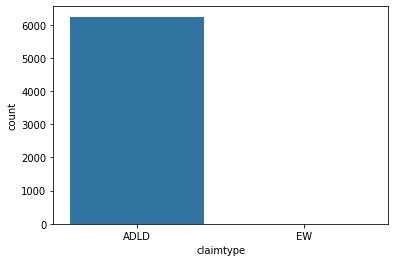

In [10]:
sns.countplot(x='claimtype',data=data)

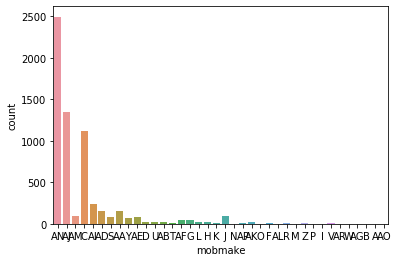

In [11]:
sns.countplot(x='mobmake', data=data)

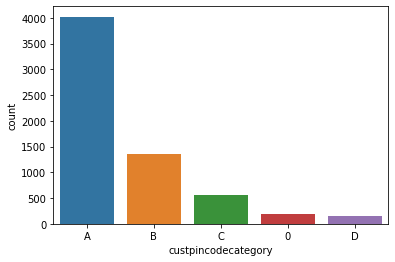

In [12]:
sns.countplot(x='custpincodecategory', data=data)

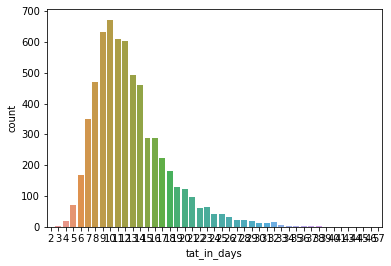

In [13]:
sns.countplot(label='count',x='tat_in_days',data=data)

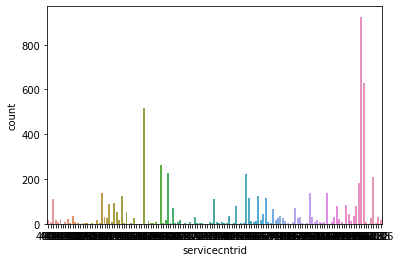

In [14]:
sns.countplot(label='count',x='servicecntrid',data=data)

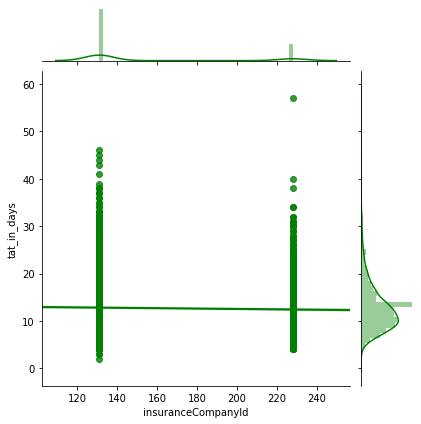

In [15]:
sns.jointplot("insuranceCompanyId", "tat_in_days", data=data, kind='reg', color="g")

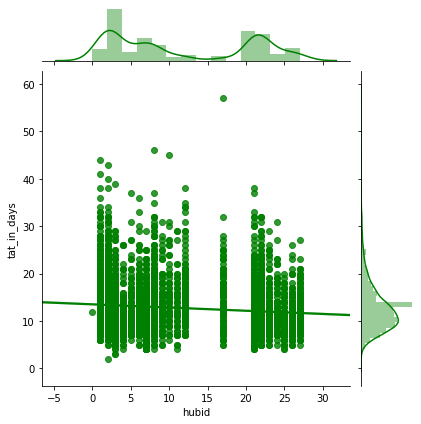

In [16]:
sns.jointplot("hubid", "tat_in_days", data=data, kind='reg', color="g")

# Encoding Categorical Data 

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
labelEncoder = LabelEncoder()

In [19]:
data['mobmake'] = labelEncoder.fit_transform(data['mobmake'])

In [20]:
data['custpincodecategory'] = labelEncoder.fit_transform(data['custpincodecategory'])

In [21]:
data['claimtype'] = labelEncoder.fit_transform(data['claimtype'])

In [22]:
#data['diff1'] = abs(data['memcreateddate']-data['mobilepurchasedate'])

In [23]:
#data['diff2'] = abs(data['pickupStartdate']-data['claimintdate'])

In [24]:
# data['diff2'] = data['diff2'] / np.timedelta64(1, 'D')
# data['diff1'] = data['diff1'] / np.timedelta64(1, 'D')

In [25]:
data['memcreateddate'] = pd.to_numeric(data.memcreateddate)
data['mobilepurchasedate'] = pd.to_numeric(data.mobilepurchasedate)
data['claimintdate'] = pd.to_numeric(data.claimintdate)
data['pickupStartdate'] = pd.to_numeric(data.pickupStartdate)
# data['diff1'] = pd.to_numeric(data.diff1)
# data['diff2'] = pd.to_numeric(data.diff2)

In [26]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,12,7,500004,233,233,131,1,0,500001,1493251200000000000,1480636800000000000,1518048000000000000,4403,1518480000000000000,5
1,2838330,8,10,226010,233,233,131,1,0,226022,1488758400000000000,1488672000000000000,1517702400000000000,4444,1518048000000000000,12
2,2835781,8,2,110018,233,233,228,1,0,110018,1517443200000000000,1517011200000000000,1517616000000000000,4388,1518393600000000000,9
3,2838589,11,2,110018,233,233,228,2,0,124001,1516147200000000000,1517356800000000000,1517702400000000000,4092,1518566400000000000,9
4,2855214,12,21,110015,233,233,131,1,0,201301,1516665600000000000,1516406400000000000,1518134400000000000,4580,1518566400000000000,8


In [27]:
feature_cols = ['mobmake'
,'hubid'
,'pickuppartnerid'
,'deliverypartnerid'
,'insuranceCompanyId'
,'custpincodecategory'
,'claimintdate'
,'servicecntrid'
,'pickupStartdate'
,'custpincode'
,'claimtype']

In [28]:
X = data[feature_cols]
y = data['tat_in_days']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# using Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
LR = LinearRegression()
LR = LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4.979088380046746


# using KNN 

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knn = KNeighborsRegressor(n_neighbors=10,algorithm='auto')

In [35]:
knn = knn.fit(X_train,y_train)

In [36]:
y_pred = knn.predict(X_test)

In [37]:
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

5.3535154766800765

# using  GradientBoostRegression

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
gra = GradientBoostingRegressor()

In [40]:
gra = gra.fit(X_train,y_train)

In [41]:
y_pred = gra.predict(X_test)

In [42]:
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

4.379592894068675

# from above GradientBoost is best

In [43]:
tdata = pd.read_csv('problem_2_test.csv')

In [44]:
tdata['memcreateddate'] = pd.to_datetime(tdata.memcreateddate)
tdata['mobilepurchasedate'] = pd.to_datetime(tdata.mobilepurchasedate)
tdata['claimintdate'] = pd.to_datetime(tdata.claimintdate)
tdata['pickupStartdate'] = pd.to_datetime(tdata.pickupStartdate)

In [45]:
tdata['mobmake'] = labelEncoder.fit_transform(tdata['mobmake'])
tdata['custpincodecategory'] = labelEncoder.fit_transform(tdata['custpincodecategory'])
tdata['claimtype'] = labelEncoder.fit_transform(tdata['claimtype'])

In [46]:
tdata['memcreateddate'] = pd.to_numeric(tdata.memcreateddate)
tdata['mobilepurchasedate'] = pd.to_numeric(tdata.mobilepurchasedate)
tdata['claimintdate'] = pd.to_numeric(tdata.claimintdate)
tdata['pickupStartdate'] = pd.to_numeric(tdata.pickupStartdate)

In [47]:
tdata.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,13,3,560011,233,233,131,1,0,560093,1501372800000000000,1501113600000000000,1517443200000000000,4467,1517875200000000000
1,2829866,10,2,110018,233,233,228,1,0,110034,1500249600000000000,1485302400000000000,1517443200000000000,4388,1518048000000000000
2,2894489,10,3,560011,233,233,228,3,0,590014,1515715200000000000,1515628800000000000,1519171200000000000,4460,1519776000000000000
3,2876708,10,2,110018,233,233,228,2,0,250110,1502064000000000000,1495324800000000000,1518739200000000000,4388,1519603200000000000
4,2890283,13,22,400104,233,233,131,3,0,496001,1510272000000000000,1506038400000000000,1519084800000000000,4581,1519344000000000000


In [48]:
X = tdata[feature_cols]

In [49]:
X.shape

(2116, 11)

In [50]:
predy = gra.predict(X)

In [51]:
tdata['memcreateddate'] = pd.to_datetime(tdata.memcreateddate)
tdata['mobilepurchasedate'] = pd.to_datetime(tdata.mobilepurchasedate)
tdata['claimintdate'] = pd.to_datetime(tdata.claimintdate)
tdata['pickupStartdate'] = pd.to_datetime(tdata.pickupStartdate)

In [52]:
tdata['Predicted_tat_in_days'] = predy.astype(int)

In [53]:
tdata.to_csv('output.csv',index = False, sep = ",")